# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

c:\Users\mblyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Не найдена указанная процедура'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.91517086, 0.61012098, 0.72769588],
       [0.81537009, 0.62789944, 0.84507462],
       [0.34488394, 0.37367121, 0.0417096 ],
       [0.04782697, 0.42786386, 0.47117476],
       [0.59244852, 0.86121054, 0.35777579]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.91517086, 5.61012098, 5.72769588],
       [5.81537009, 5.62789944, 5.84507462],
       [5.34488394, 5.37367121, 5.0417096 ],
       [5.04782697, 5.42786386, 5.47117476],
       [5.59244852, 5.86121054, 5.35777579]])

In [5]:
# матричное умножение
a @ a.T

array([[1.73932661, 1.74425488, 0.57396428, 0.6476905 , 1.32798621],
       [1.74425488, 1.7732372 , 0.55108372, 0.70582999, 1.32616566],
       [0.57396428, 0.55108372, 0.2603148 , 0.19602767, 0.54105825],
       [0.6476905 , 0.70582999, 0.19602767, 0.40736056, 0.56539081],
       [1.32798621, 1.32616566, 0.54105825, 0.56539081, 1.22068237]])

In [6]:
# среднее по колонкам
a.mean(axis=-1)

array([0.75099591, 0.76278138, 0.25342158, 0.31562186, 0.60381162])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE
np.sum((np.arange(1,10000)**2))

-1724114088

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [9]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.7592, 0.6103, 0.5273],
        [0.6605, 0.6893, 0.4926],
        [0.8113, 0.1965, 0.8042],
        [0.4400, 0.6439, 0.0930],
        [0.1434, 0.6310, 0.1751]])

In [10]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [11]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [12]:
# сложение
x + 5

tensor([[5.7592, 5.6103, 5.5273],
        [5.6605, 5.6893, 5.4926],
        [5.8113, 5.1965, 5.8042],
        [5.4400, 5.6439, 5.0930],
        [5.1434, 5.6310, 5.1751]])

In [13]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.2269, 1.1819, 1.1599, 0.7761, 0.5863],
        [1.1819, 1.1540, 1.0674, 0.7803, 0.6159],
        [1.1599, 1.0674, 1.3435, 0.5583, 0.3812],
        [0.7761, 0.7803, 0.5583, 0.6169, 0.4857],
        [0.5863, 0.6159, 0.3812, 0.4857, 0.4493]])

In [14]:
x.transpose(0, 1)

tensor([[0.7592, 0.6605, 0.8113, 0.4400, 0.1434],
        [0.6103, 0.6893, 0.1965, 0.6439, 0.6310],
        [0.5273, 0.4926, 0.8042, 0.0930, 0.1751]])

In [15]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.2269, 1.1819, 1.1599, 0.7761, 0.5863],
        [1.1819, 1.1540, 1.0674, 0.7803, 0.6159],
        [1.1599, 1.0674, 1.3435, 0.5583, 0.3812],
        [0.7761, 0.7803, 0.5583, 0.6169, 0.4857],
        [0.5863, 0.6159, 0.3812, 0.4857, 0.4493]])

In [16]:
# поэлементное умножение
x * x

tensor([[0.5763, 0.3725, 0.2781],
        [0.4363, 0.4751, 0.2426],
        [0.6582, 0.0386, 0.6467],
        [0.1936, 0.4147, 0.0087],
        [0.0206, 0.3981, 0.0307]])

In [17]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.6323, 0.6141, 0.6040, 0.3923, 0.3165])

In [18]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [19]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [20]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [21]:
# YOUR CODE
(torch.arange(1,10001)**2).sum()

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [22]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[-2.6608e+36,  1.7488e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [23]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.0692, 0.1027, 0.3556],
        [0.0859, 0.1592, 0.2812],
        [0.2733, 0.8719, 0.9057],
        [0.2553, 0.9183, 0.0786],
        [0.1121, 0.6008, 0.8642]])

In [24]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [25]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [26]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [27]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.3497, -1.9711,  0.4932],
        [ 0.6470,  0.4999, -0.3962],
        [ 0.7420, -1.6840, -0.4895],
        [-0.1654, -0.3070,  0.3860],
        [ 1.5573,  0.8721, -0.5349]])

In [28]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [29]:
x

tensor([[0.6632, 0.6325, 0.7227],
        [0.2971, 0.8909, 0.2883],
        [0.8637, 0.3846, 0.9622],
        [0.7660, 0.9772, 0.6487],
        [0.0570, 0.8343, 0.2953]])

In [30]:
y

tensor([[0.0570, 0.7380, 0.9225],
        [0.2035, 0.5717, 0.6914],
        [0.2138, 0.9187, 0.0026],
        [0.0749, 0.7433, 0.5925],
        [0.4117, 0.2663, 0.9061]])

In [31]:
# сложение
x + y

tensor([[0.7202, 1.3705, 1.6452],
        [0.5007, 1.4626, 0.9797],
        [1.0774, 1.3033, 0.9648],
        [0.8409, 1.7206, 1.2412],
        [0.4687, 1.1006, 1.2015]])

In [32]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.7202, 1.3705, 1.6452],
        [0.5007, 1.4626, 0.9797],
        [1.0774, 1.3033, 0.9648],
        [0.8409, 1.7206, 1.2412],
        [0.4687, 1.1006, 1.2015]])

In [33]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.7202, 1.3705, 1.6452],
        [0.5007, 1.4626, 0.9797],
        [1.0774, 1.3033, 0.9648],
        [0.8409, 1.7206, 1.2412],
        [0.4687, 1.1006, 1.2015]])

In [34]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(2).size()

torch.Size([5, 3, 1])

In [35]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [36]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [37]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [38]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [39]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [40]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [41]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [42]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

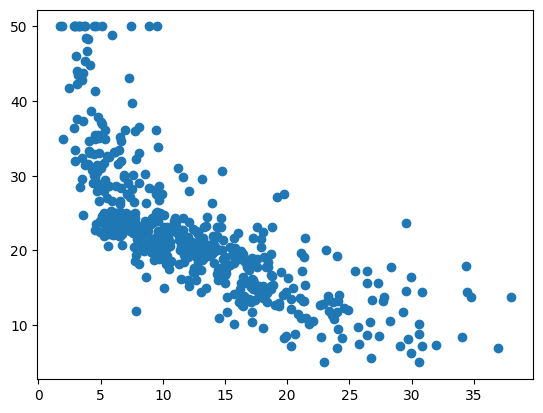

In [43]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

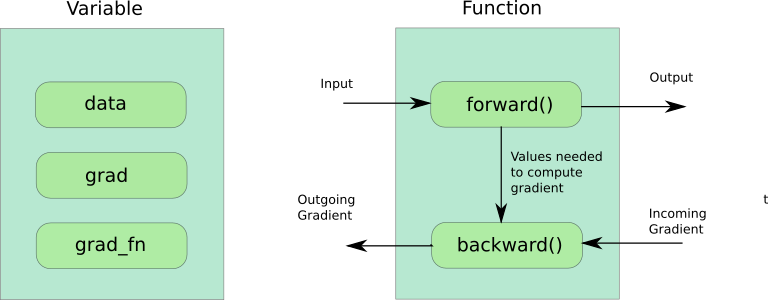

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [44]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [45]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [46]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [47]:
torch.sum(2*(y_pred - y))/len(x)

tensor(-43.9910, grad_fn=<DivBackward0>)

In [48]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None
print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.1087])
dL/db = tensor([-43.9910])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [49]:
w.data, w.grad

(tensor([0.0563]), tensor([-12.1087]))

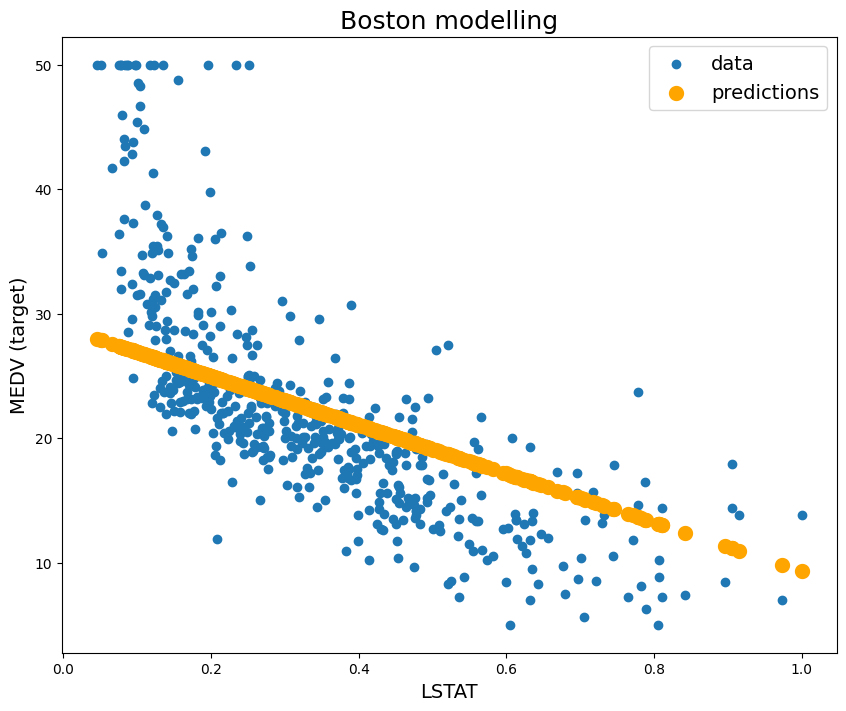

loss =  48.14599


In [50]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad # type: ignore
    b.data -= 0.05 * b.grad  # type: ignore

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [51]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [52]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [53]:
our_dataset = RandomDataset(x, y)

In [54]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6084, 0.7549, 0.4775, 0.9761, 0.7225]),
 'target': 0.5215394001723772}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [55]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [56]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.6890, 0.3993, 0.5095, 0.4472, 0.1890],
        [0.6084, 0.7549, 0.4775, 0.9761, 0.7225],
        [0.7201, 0.5302, 0.2720, 0.1224, 0.4748],
        [0.6058, 0.3671, 0.5093, 0.9637, 0.7091]])
Target:
tensor([0.2158, 0.5215, 0.3793, 0.1480], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [57]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 2))

In [58]:
y_pred = another_model(batch["sample"])  # получили предсказания модели

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [77]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

In [60]:
for x, y in train_dataloader:
    print(x.shape, y)
    break

torch.Size([4, 1, 28, 28]) tensor([0, 0, 4, 3])


In [61]:
mnist_train[4][0].shape

torch.Size([1, 28, 28])

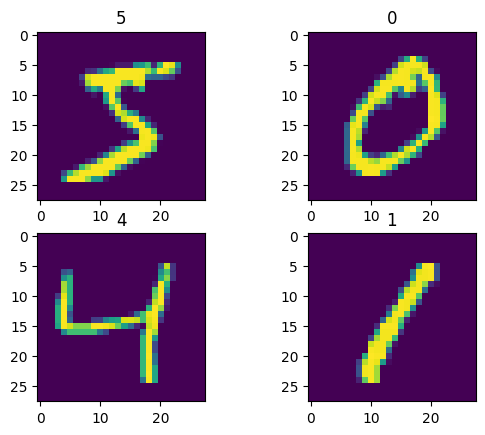

In [62]:
# посмотрим на то, с чем мы работаем
for i in [0, 1, 2, 3]:
    plt.subplot(2, 2, i + 1)
    plt.imshow(mnist_train[i][0].numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [63]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [64]:
a = [x for x in model.named_parameters()]
a[2][1].data.shape

torch.Size([10, 128])

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [476]:
# !pip install wandb --upgrade --quiet

^C


In [ ]:
import wandb

In [ ]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login
#wandb.login()

In [ ]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [124]:
if torch.cuda.is_available():
    device = torch.device('gpu')
else:
    device = torch.device('cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [478]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.9298, 0.0734],
        [0.7859, 0.7430]])

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [ ]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
print(input)
print(target)
loss = F.cross_entropy(input, target)
print(loss)
loss.backward()
# Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# loss = F.cross_entropy(input, target)
# loss.backward()

tensor([[ 0.4072, -1.1279, -1.1659,  0.1094,  0.4915],
        [ 0.2812,  1.1585,  0.6165, -1.9462, -0.8758],
        [ 0.8008, -0.8464, -0.7480,  0.2266, -0.2249]], requires_grad=True)
tensor([2, 2, 3])
tensor(1.8299, grad_fn=<NllLossBackward0>)


In [162]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(3):
    i = 0
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        i+=1
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров
    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )
        # скидываем метрики на wandb и автоматом смотрим на графики
        # wandb.log(
        #     {
        #         "mean val loss": np.mean(val_loss),
        #         "mean val accuracy": np.mean(val_accuracy),
        #     }
        # )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10231168568134308, accuracy: 0.9691


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.10137562453746796, accuracy: 0.9716


### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)